# Power Spectrum Simulations

This notebook introduces the frequency domain simulations used in this project.

Power spectra are simulated using [SpecParam](https://fooof-tools.github.io/). 

In [1]:
from fooof.sim import gen_power_spectrum

from neurodsp.utils import set_random_seed
from neurodsp.plts import plot_power_spectra

/var/folders/59/8y2d5r257c77vzymnqs47x080000gn/T/ipykernel_73408/3539184415.py:1: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.sim import gen_power_spectrum


In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from apm.io import APMDB
from apm.plts.style import custom_psd_style
from apm.plts.settings import EXT

In [3]:
# Set plot style
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Set random seed
set_random_seed(111)

In [5]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / '12_psd_sims'

### Single Peak & Fixed Mode

First, we can simulate a power spectrum with a single peak with a 1/f aperiodic component. 

In [6]:
# Simulate a power spectrum
freqs, powers = gen_power_spectrum([3, 40], [1, 1], [10, 0.3, 1], nlv=0.025)

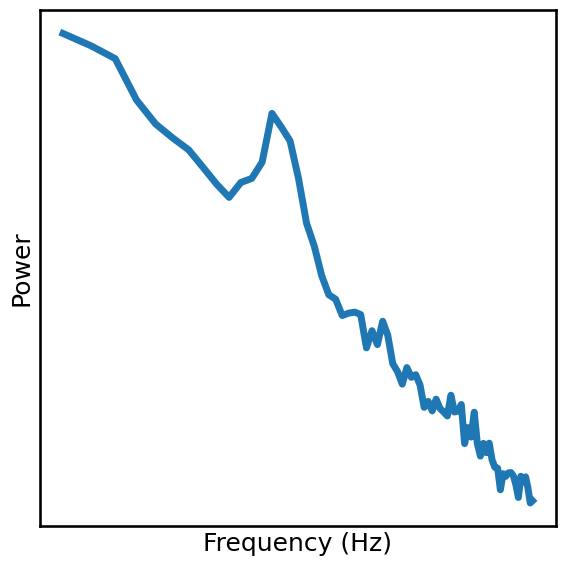

In [7]:
# Plot the power spectrum
plot_power_spectra(freqs, powers, lw=5, ylabel='Power', custom_styler=custom_psd_style,
                   save_fig=SAVE_FIG, file_name='psd_fixed' + EXT, file_path=FIGPATH)

### Multi-Peak & Knee Mode

Next, we can simulate a pwoer spectrum that has multiple peaks, and an aperiodic component with a knee.

In [8]:
# Simulate a power spectrum, with a knee
freqs, powers = gen_power_spectrum([1, 75], [0, 400, 1], [[5, 0.025, 1], [30, 0.02, 4]], nlv=0.001)

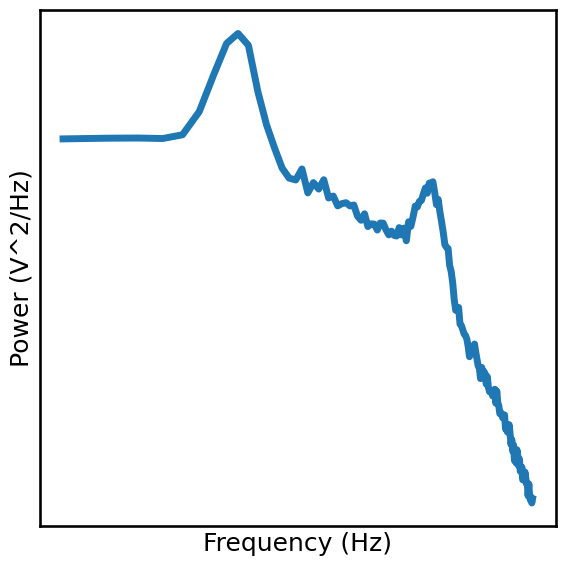

In [9]:
# Plot the power spectrum
plot_power_spectra(freqs, powers, lw=5, custom_styler=custom_psd_style,
                   save_fig=SAVE_FIG, file_name='psd_knee' + EXT, file_path=FIGPATH)